In [2]:
pwd

'/home/jovyan/MLFall24/Datasets/FAOSTAT/Assignment code'

In [3]:
#Which crops drive emissions and does it correlate with climate change? 

In [4]:
!pip install xgboost

  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl (199.0 MB)


In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
temp = pd.read_csv("Temp_brazil.csv")
temp

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,76,Brazil,7271,Temperature change,7001,January,1961,1961,°c,-0.116,E,Estimated value
1,ET,Temperature change on land,76,Brazil,7271,Temperature change,7001,January,1962,1962,°c,-0.082,E,Estimated value
2,ET,Temperature change on land,76,Brazil,7271,Temperature change,7001,January,1963,1963,°c,0.062,E,Estimated value
3,ET,Temperature change on land,76,Brazil,7271,Temperature change,7001,January,1964,1964,°c,-0.012,E,Estimated value
4,ET,Temperature change on land,76,Brazil,7271,Temperature change,7001,January,1965,1965,°c,-0.475,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,ET,Temperature change on land,76,Brazil,7271,Temperature change,7020,Meteorological year,2019,2019,°c,1.540,E,Estimated value
1067,ET,Temperature change on land,76,Brazil,7271,Temperature change,7020,Meteorological year,2020,2020,°c,1.452,E,Estimated value
1068,ET,Temperature change on land,76,Brazil,7271,Temperature change,7020,Meteorological year,2021,2021,°c,1.149,E,Estimated value
1069,ET,Temperature change on land,76,Brazil,7271,Temperature change,7020,Meteorological year,2022,2022,°c,0.997,E,Estimated value


In [7]:
avg = temp.groupby("Year")["Value"].mean().reset_index()

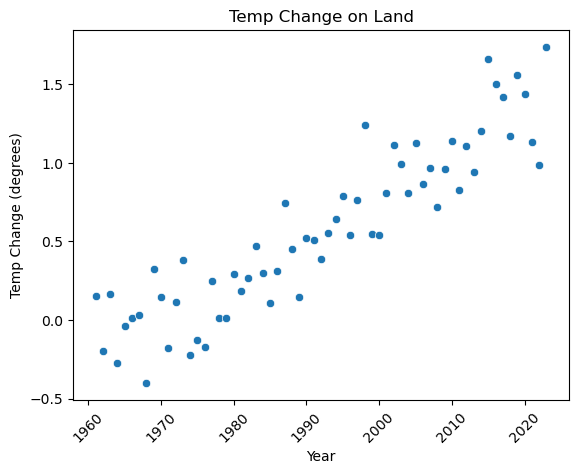

In [8]:
sns.scatterplot(data=avg, x='Year', y='Value')
plt.xticks(rotation=45)
plt.title("Temp Change on Land")
plt.ylabel("Temp Change (degrees)")
plt.show()

In [9]:
emissions_total = pd.read_csv("brazil_total_emissions.csv")

In [10]:
emissions_total.Unit.unique()

array(['kt'], dtype=object)

In [11]:
emissions_total

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,4.7895,E,Estimated value,NaN
1,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),5064,Crop Residues,1962,1962,3050,FAO TIER 1,kt,5.0591,E,Estimated value,NaN
2,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),5064,Crop Residues,1963,1963,3050,FAO TIER 1,kt,5.3884,E,Estimated value,NaN
3,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),5064,Crop Residues,1964,1964,3050,FAO TIER 1,kt,5.5976,E,Estimated value,NaN
4,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),5064,Crop Residues,1965,1965,3050,FAO TIER 1,kt,6.4786,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),6819,Other,2018,2018,3050,FAO TIER 1,kt,17.4680,E,Estimated value,NaN
2490,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),6819,Other,2019,2019,3050,FAO TIER 1,kt,20.6949,E,Estimated value,NaN
2491,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),6819,Other,2020,2020,3050,FAO TIER 1,kt,22.8798,E,Estimated value,NaN
2492,GT,Emissions totals,76,Brazil,7230,Emissions (N2O),6819,Other,2021,2021,3050,FAO TIER 1,kt,21.1592,E,Estimated value,NaN


3. Temporal Trends and Drivers
Question: How have the contributions of different emission sources to temperature change evolved over time?
How Random Forest Helps: Add a temporal component (e.g., year or month) to the features and train the model to assess time-based changes in feature importance.

. Scenario Modeling
Question: What would the temperature change look like under hypothetical reductions in emissions from certain sources?
How Random Forest Helps: Use the trained model to simulate scenarios (e.g., reducing emissions by 10% from agriculture) and predict corresponding temperature changes.

In [12]:
avg.Year.value_counts()

1961    1
2008    1
1995    1
1996    1
1997    1
       ..
1987    1
1988    1
1989    1
1990    1
2023    1
Name: Year, Length: 63, dtype: int64

In [13]:
aggregated_df = emissions_total.groupby(['Element', 'Year', 'Item']).agg({'Value': 'mean'}).reset_index()

# Pivot using both 'Item' and 'Element' as columns
pivoted_df = aggregated_df.pivot(index='Year', columns=['Item', 'Element'], values='Value')

# Reset the index to make it easier to work with
pivoted_df = pivoted_df.reset_index()

# Add the target column back (if it's consistent per year)
pivoted_df['Temperature Change'] = avg.iloc[:-1,:].groupby('Year')['Value'].first().values

#print(len(avg.iloc[:-1,:]))
#len(pivoted_df)

In [14]:
pivoted_df

Item,Year,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Temperature Change
Element,,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,1961,26.8074,624.4789,3483.8795,3.2560,96.7499,206.1854,863.8747,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153882
1,1962,28.1906,649.3778,3587.9367,3.8842,99.1519,217.6037,907.6505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.195647
2,1963,30.5178,673.7380,3710.6384,3.8496,102.3326,241.7681,953.3297,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166353
3,1964,31.5557,696.9348,3833.5982,4.2987,105.5227,271.6862,1000.5038,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.273235
4,1965,34.3620,715.9709,3967.1369,4.7361,108.8887,300.0436,1048.8588,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2018,66.1603,1596.2200,12626.1045,5.6537,301.9356,121.6152,5604.5456,2889.2982,87.6786,...,0.0605,0.0370,0.0372,0.0232,2.0793,8.1813,8.4294,0.0747,8.9186,1.172235
58,2019,69.8165,1666.1903,12704.4987,5.4631,302.7572,111.0857,5596.9116,2889.9927,252.4889,...,0.0620,0.0373,0.0371,0.0239,2.0940,23.4871,8.6462,0.0833,20.7876,1.561824
59,2020,71.9611,1673.4704,12868.9557,4.9955,307.0517,108.9837,5665.4303,2884.9652,396.3365,...,0.0646,0.0390,0.0386,0.0218,2.0097,36.4523,8.8698,0.0765,21.4305,1.438118


In [15]:
#Indexing
#pivoted_df[('CO2', 'Emission')]  # Access CO2 Emission values
#pivoted_df[('CO2', 'Absorption')]  # Access CO2 Absorption values

df = pivoted_df.copy()

In [16]:
df = df.fillna(0)

# The target column is 'Temperature Change'
X = df.drop(columns=['Year', 'Temperature Change'])
y = df['Temperature Change']

/tmp/ipykernel_301/1596973391.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=['Year', 'Temperature Change'])


In [17]:
df

Item,Year,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Temperature Change
Element,,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,1961,26.8074,624.4789,3483.8795,3.2560,96.7499,206.1854,863.8747,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.153882
1,1962,28.1906,649.3778,3587.9367,3.8842,99.1519,217.6037,907.6505,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.195647
2,1963,30.5178,673.7380,3710.6384,3.8496,102.3326,241.7681,953.3297,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.166353
3,1964,31.5557,696.9348,3833.5982,4.2987,105.5227,271.6862,1000.5038,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.273235
4,1965,34.3620,715.9709,3967.1369,4.7361,108.8887,300.0436,1048.8588,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.037412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2018,66.1603,1596.2200,12626.1045,5.6537,301.9356,121.6152,5604.5456,2889.2982,87.6786,...,0.0605,0.0370,0.0372,0.0232,2.0793,8.1813,8.4294,0.0747,8.9186,1.172235
58,2019,69.8165,1666.1903,12704.4987,5.4631,302.7572,111.0857,5596.9116,2889.9927,252.4889,...,0.0620,0.0373,0.0371,0.0239,2.0940,23.4871,8.6462,0.0833,20.7876,1.561824
59,2020,71.9611,1673.4704,12868.9557,4.9955,307.0517,108.9837,5665.4303,2884.9652,396.3365,...,0.0646,0.0390,0.0386,0.0218,2.0097,36.4523,8.8698,0.0765,21.4305,1.438118


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(49, 58) (49,) (13, 58) (13,)


In [19]:
X_train

Item,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,Fires in organic soils,...,Fires in humid tropical forests,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires
Element,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O)
13,42.0213,885.8408,5533.2371,4.7924,145.8225,303.0308,1657.3983,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
33,52.7605,1092.6450,9598.2588,4.2682,226.9344,286.7856,3553.2246,2400.2352,274.1102,0.0,...,20.1645,0.0265,0.0276,0.0284,0.0103,0.8508,20.8988,4.9328,0.0101,18.6300
34,53.2252,1047.2185,9780.8790,4.0866,231.9245,284.1050,3655.9782,2437.0103,274.1102,0.0,...,20.1645,0.0294,0.0309,0.0313,0.0107,0.9460,20.8988,5.2555,0.0092,18.6300
3,31.5557,696.9348,3833.5982,4.2987,105.5227,271.6862,1000.5038,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17,45.6210,903.3090,6511.7816,4.1406,162.5112,365.3035,1976.0525,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
54,65.1907,1573.5884,12767.0484,5.2584,298.7022,138.9103,5246.4945,2896.6659,254.6620,0.0,...,23.2517,0.0723,0.0411,0.0442,0.0330,2.1398,24.4690,8.0050,0.0749,21.8909
8,37.3811,778.9425,4507.4324,6.5830,121.6531,300.1606,1254.2066,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,35.2601,745.5165,4225.1356,5.6676,114.8681,278.7529,1148.9247,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
31,52.5296,1065.8402,9386.0540,4.1328,221.7707,304.4689,3315.3078,2367.3112,274.1102,0.0,...,20.1645,0.0250,0.0254,0.0271,0.0079,0.7804,20.8988,4.2533,0.0080,18.6300


In [20]:
X_test

Item,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,Fires in organic soils,...,Fires in humid tropical forests,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires
Element,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O)
50,58.9394,1497.4004,12655.8296,5.4910,294.3875,178.8278,4776.9170,3171.2592,98.7541,0.0,...,9.0167,0.0361,0.0249,0.0145,0.0123,1.9170,10.6320,7.1455,0.0513,14.9999
56,69.9728,1606.9251,12691.2852,5.5329,302.1388,130.3229,5416.7957,2885.9672,300.8770,0.0,...,27.4714,0.0591,0.0414,0.0387,0.0229,2.2272,27.7785,8.4269,0.0702,22.1172
0,26.8074,624.4789,3483.8795,3.2560,96.7499,206.1854,863.8747,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
57,66.1603,1596.2200,12626.1045,5.6537,301.9356,121.6152,5604.5456,2889.2982,87.6786,0.0,...,8.0054,0.0605,0.0370,0.0372,0.0232,2.0793,8.1813,8.4294,0.0747,8.9186
5,33.0904,733.2356,4102.7776,5.6980,112.0613,260.1551,1098.3003,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
48,58.8812,1392.1365,12208.5714,4.4214,284.6842,186.5675,4642.8040,2925.8888,60.4416,0.0,...,5.5186,0.0340,0.0174,0.0086,0.0123,1.4551,5.9034,6.9609,0.0400,9.0634
16,48.1408,888.7285,6533.5602,4.3260,163.6213,389.2462,1871.4705,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
12,39.3382,791.6863,5228.9250,5.0288,139.1535,311.4723,1604.0719,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25,53.0773,1357.2660,8059.2923,3.4908,192.8877,363.1866,2710.9192,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
y_train

13   -0.221824
33    0.641765
34    0.791706
3    -0.273235
17    0.013000
54    1.663235
8     0.321824
6     0.030765
31    0.390412
4    -0.037412
45    0.864412
19    0.289412
52    0.941647
36    0.762529
53    1.203353
41    1.110647
58    1.561824
15   -0.174647
40    0.809706
27    0.448706
26    0.742235
24    0.110471
44    1.126824
11    0.114765
32    0.551353
55    1.504706
43    0.807000
37    1.240824
29    0.518706
46    0.966529
1    -0.195647
21    0.268824
2     0.166353
49    1.136059
39    0.541529
35    0.542765
23    0.299118
60    1.135059
10   -0.178059
22    0.469353
18    0.015647
61    0.985471
20    0.185706
7    -0.400706
42    0.991176
14   -0.125706
28    0.147294
51    1.105412
38    0.547941
Name: Temperature Change, dtype: float64

In [22]:
y_test

50    0.829000
56    1.422059
0     0.153882
57    1.172235
5     0.010294
48    0.958706
16    0.250882
12    0.380235
25    0.313647
59    1.438118
30    0.510941
9     0.146529
47    0.719235
Name: Temperature Change, dtype: float64

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.039105996897897205


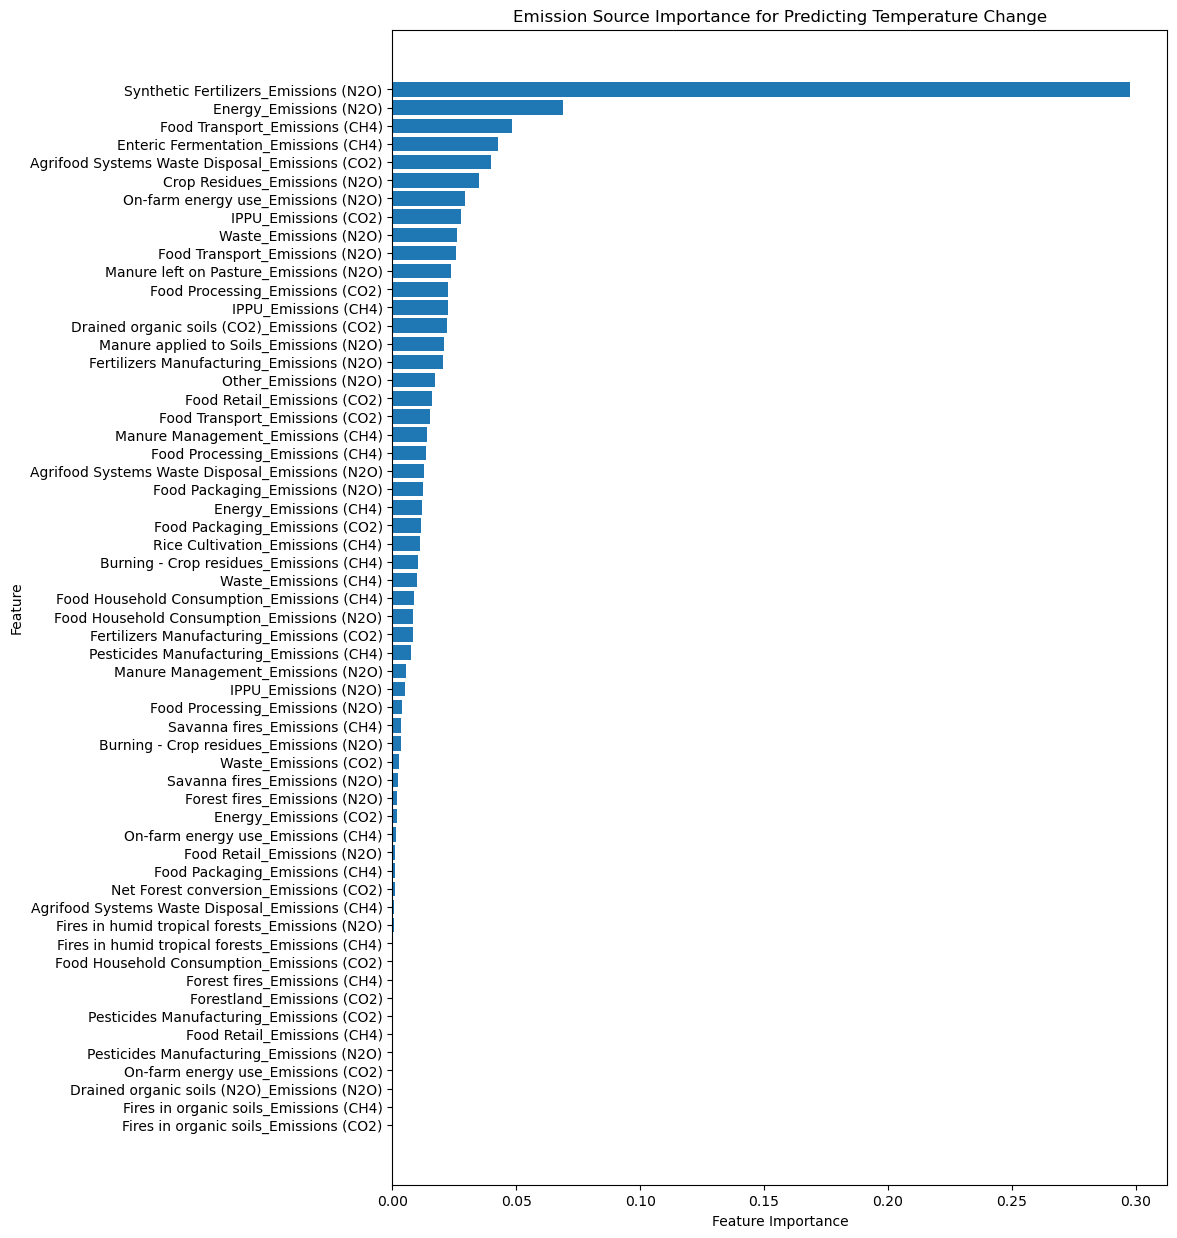

In [24]:
import matplotlib.pyplot as plt

# Flatten multi-index columns if needed
if isinstance(X.columns, pd.MultiIndex):
    feature_names = ['_'.join(map(str, col)) for col in X.columns]
else:
    feature_names = X.columns

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]  # argsort returns indices of the sorted array
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]
plt.figure(figsize=(10, 15)) 
# Create a horizontal bar chart
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Emission Source Importance for Predicting Temperature Change')
plt.gca().invert_yaxis()  # Optional: To reverse the order, so the most important feature is at the top
plt.show()

In [25]:
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

Item,Year,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Temperature Change
Element,,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,0.000000,0.000000,0.000000,0.000000,0.046763,0.000000,0.308086,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268704
1,0.016393,0.026025,0.023617,0.010085,0.126396,0.010345,0.343010,0.008941,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099353
2,0.032787,0.069812,0.046722,0.021977,0.122010,0.024044,0.416919,0.018270,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274746
3,0.049180,0.089340,0.068725,0.033894,0.178939,0.037784,0.508427,0.027905,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061761
4,0.065574,0.142141,0.086780,0.046836,0.234386,0.052281,0.595160,0.037782,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176020


In [26]:
X = df_norm.drop(columns=['Year', 'Temperature Change'])
y = df_norm['Temperature Change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(49, 58) (49,) (13, 58) (13,)


/tmp/ipykernel_301/1672988796.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_norm.drop(columns=['Year', 'Temperature Change'])


In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.008975040347256685


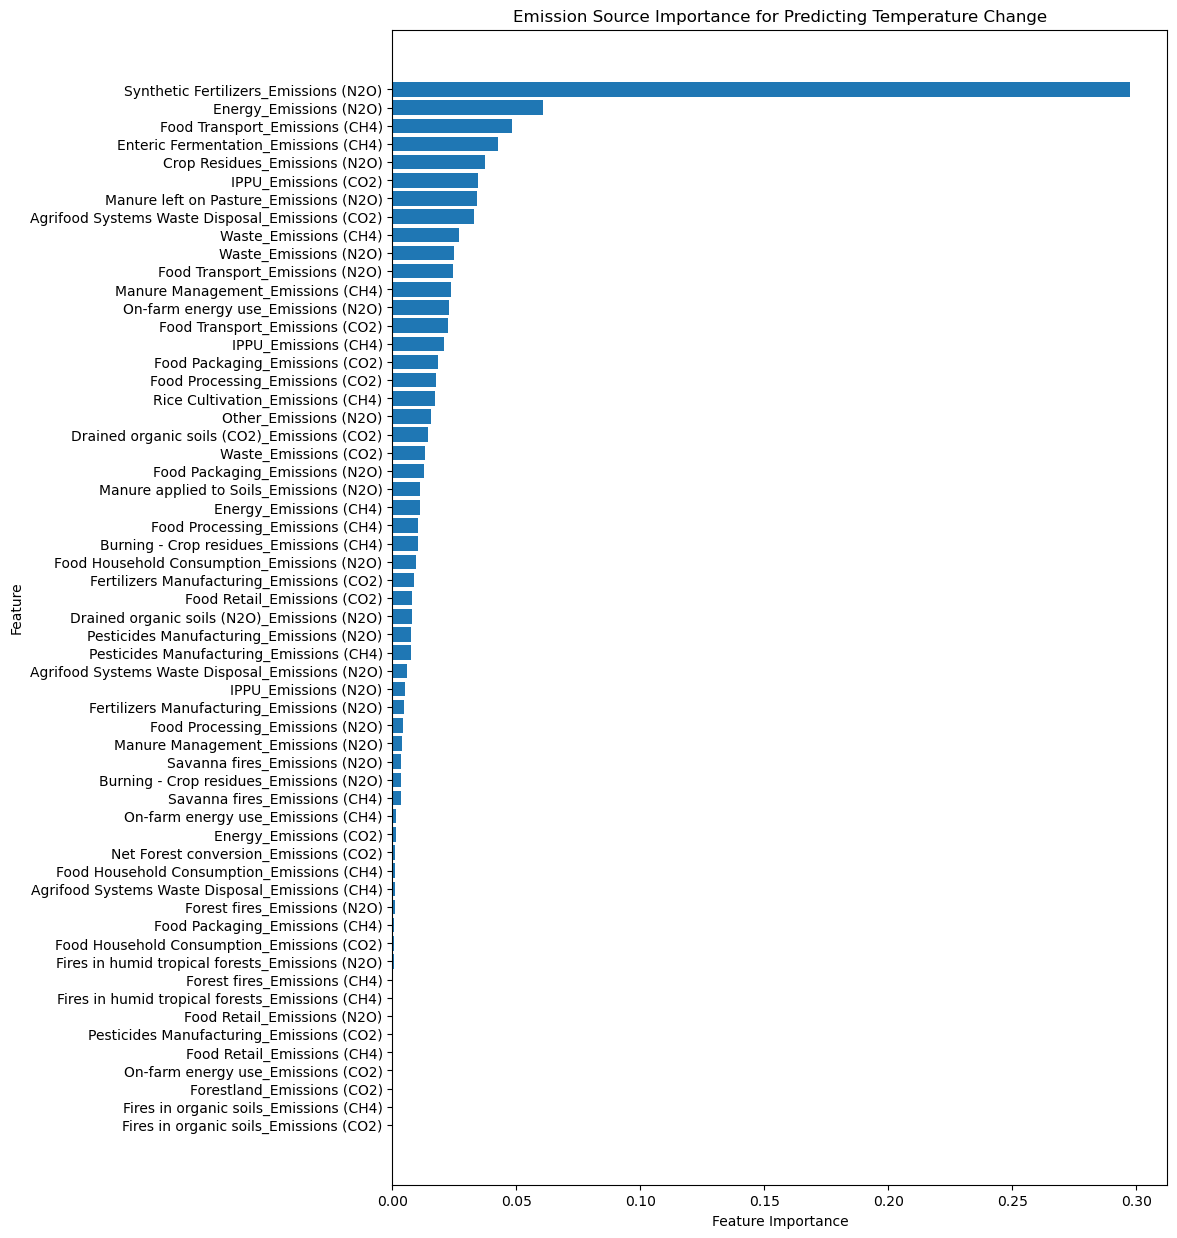

In [28]:
import matplotlib.pyplot as plt

# Flatten multi-index columns if needed
if isinstance(X.columns, pd.MultiIndex):
    feature_names = ['_'.join(map(str, col)) for col in X.columns]
else:
    feature_names = X.columns

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]  # argsort returns indices of the sorted array
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]
plt.figure(figsize=(10, 15)) 
# Create a horizontal bar chart
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Emission Source Importance for Predicting Temperature Change')
plt.gca().invert_yaxis()  # Optional: To reverse the order, so the most important feature is at the top
plt.show()

MAE: 0.08
MSE: 0.01
RMSE: 0.09
R²: 0.83


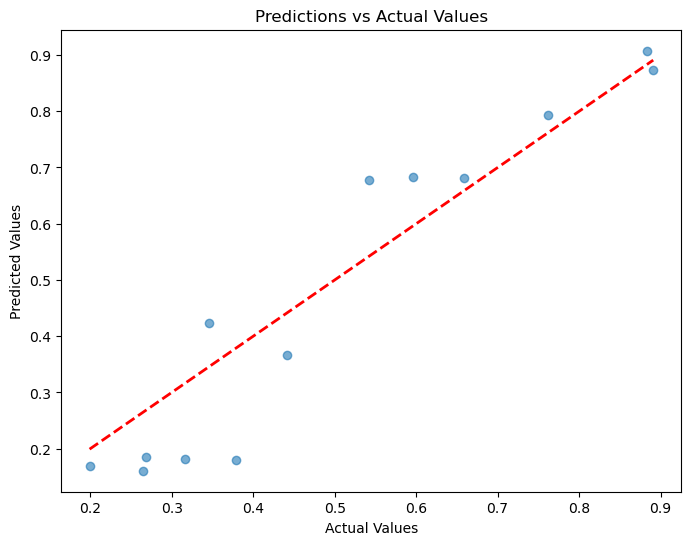

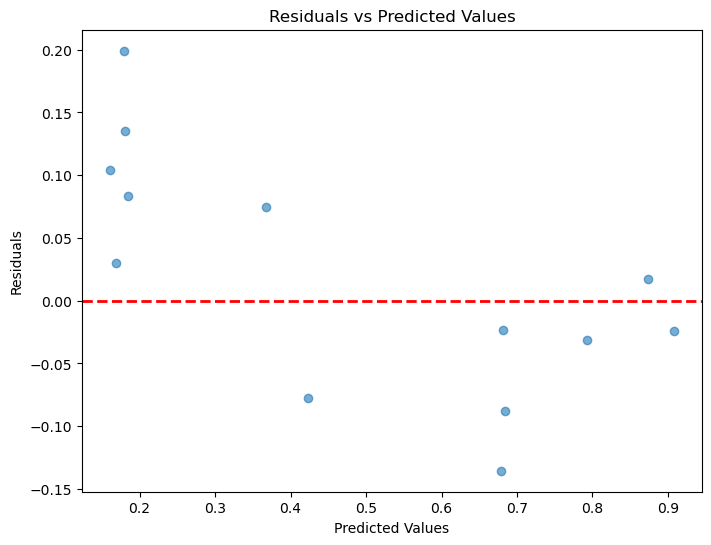

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae.round(2)}")
print(f"MSE: {mse.round(2)}")
print(f"RMSE: {rmse.round(2)}")
print(f"R²: {r2.round(2)}")

# Scatter Plot: Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Get predictions
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Combine predictions with a weighted average
alpha = 0.5  # Weight for Random Forest
beta = 1 - alpha  # Weight for XGBoost

y_pred_ensemble = (alpha * y_pred_rf) + (beta * y_pred_xgb)

# Evaluate
mse = mean_squared_error(y_test, y_pred_ensemble)
print(f"Ensemble MSE: {mse:.2f}")

Ensemble MSE: 0.01


MAE: 0.08298065870072385
MSE: 0.010181748229684418
RMSE: 0.10090464919756878
R²: 0.8051568836583354


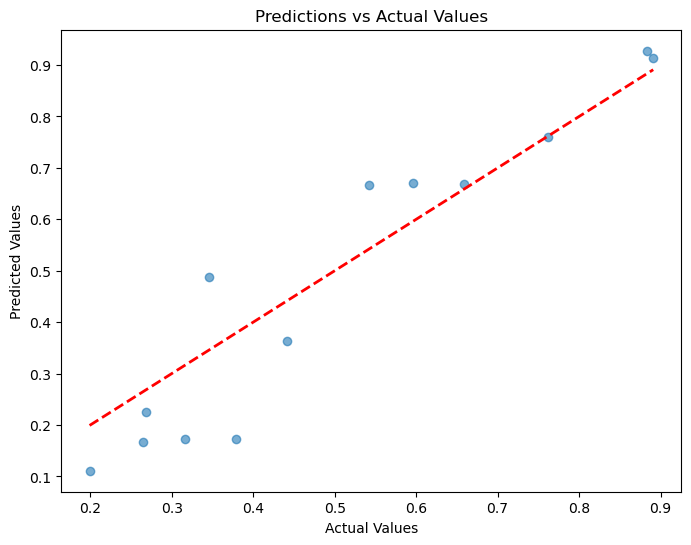

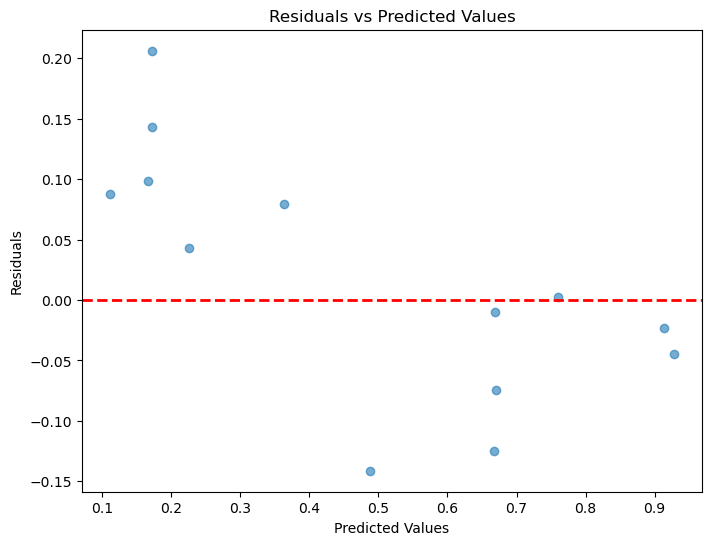

In [31]:
# Assuming y_test and y_pred are available
mae = mean_absolute_error(y_test, y_pred_ensemble)
mse = mean_squared_error(y_test, y_pred_ensemble)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_ensemble)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Scatter Plot: Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred_ensemble
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ensemble, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_norm)

# Step 2: Apply PCA (Choose the number of components to retain)
pca = PCA(n_components=2)  # Adjust n_components based on how many components you want to keep
pca_result = pca.fit_transform(df_standardized)

# Step 3: Convert PCA result to DataFrame for easier inspection
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])  # Adjust columns based on the number of components

# If you want to keep more components, you can modify n_components in the PCA() call

# Print the explained variance ratio to see how much variance each component explains
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")

# If you want to see the PCA components (the eigenvectors of the covariance matrix)
print("PCA Components (eigenvectors):")
print(pca.components_)

# Step 4: Optionally, you can concatenate this with the original data for further analysis
df_with_pca = pd.concat([df_norm, pca_df], axis=1)

# Print the resulting dataframe with PCA features
print(df_with_pca.head())

Explained variance ratio for each component: [0.81703113 0.06848997]
PCA Components (eigenvectors):
[[ 0.14123979  0.1195927   0.12528889  0.13938408  0.03733428  0.13995426
  -0.11901617  0.14198082  0.13941855  0.10034747  0.          0.14084572
   0.13170583  0.12875312  0.14308127  0.14186713  0.10086991  0.14322992
   0.12889143  0.121944    0.14029642  0.13976441  0.13647371  0.13669093
   0.14122547  0.13298804  0.          0.14270694  0.13619034  0.13194993
   0.13906486  0.14326653 -0.12690847  0.10677964  0.14374972  0.12801519
   0.11959343  0.13226985  0.14175334 -0.08311074  0.13130061  0.13163895
   0.14002255  0.12263616  0.12943276  0.14327187  0.14285843  0.14098771
   0.13864493  0.11585075  0.14121402  0.13522449  0.12361975  0.13824479
   0.14286233  0.11573694  0.14342171  0.12822543  0.12194402  0.1335813 ]
 [-0.06696102 -0.22081759 -0.13449803 -0.03834983 -0.03607291 -0.05934732
   0.00884135 -0.04635599  0.10150252  0.30207277 -0.          0.09271373
  -0.154761

In [33]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming df_norm is the normalized dataframe

# Step 1: Standardize the data if not already done
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_norm)

# Step 2: Apply PCA (Reducing to 2 components for simplicity, adjust as necessary)
pca = PCA(n_components=2)  # Adjust n_components based on your needs
pca_result = pca.fit_transform(df_standardized)




In [34]:
pca_result

array([[-8.49780907,  0.87522699],
       [-8.48819711,  0.76383235],
       [-8.31794415,  0.61639162],
       [-8.37079309,  0.52827853],
       [-8.19770814,  0.33950759],
       [-8.04208113,  0.30205484],
       [-7.95882119,  0.1674495 ],
       [-7.96972082,  0.06293826],
       [-7.67141102, -0.07202067],
       [-7.49613387, -0.15372062],
       [-7.45944849, -0.25589403],
       [-7.21195537, -0.36325113],
       [-7.05718491, -0.37830413],
       [-7.05597383, -0.62345941],
       [-6.71234331, -1.01448841],
       [-6.87107877, -0.98854395],
       [-6.53991596, -1.07192218],
       [-6.61838236, -0.96818756],
       [-6.30540454, -1.20067224],
       [-6.10924048, -1.33687936],
       [-6.21259887, -1.192978  ],
       [-5.95485318, -1.3549582 ],
       [-5.88415269, -1.0597229 ],
       [-5.55529084, -1.40374077],
       [-5.53673547, -1.48459279],
       [-5.38617171, -1.7475737 ],
       [-5.0241156 , -1.93247299],
       [-5.00570277, -1.89830289],
       [-4.87222268,

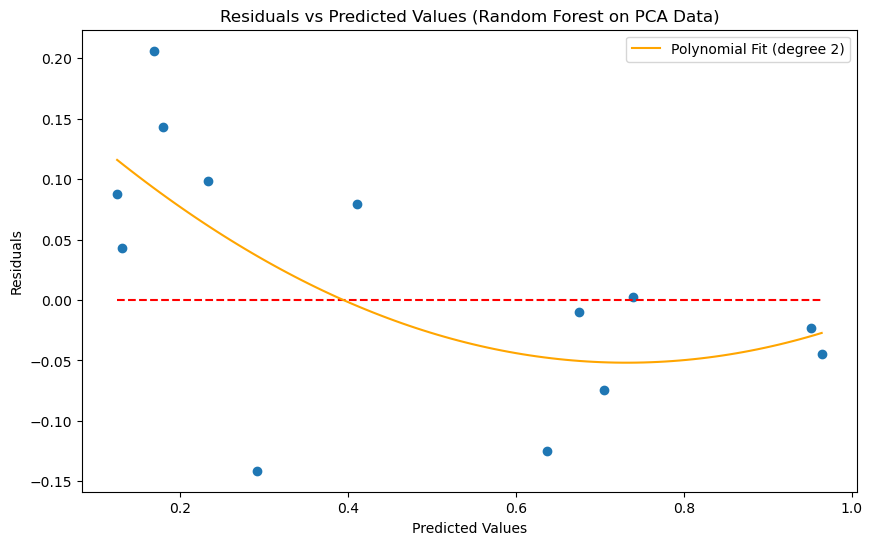

Mean Squared Error: 0.009477993916937433
MAE: 0.08298065870072385
MSE: 0.010181748229684418
RMSE: 0.10090464919756878
R²: 0.8051568836583354


In [35]:
# Step 3: Split the data into features (X) and target (y)
X = pca_result
y = df_norm['Temperature Change']  # Replace 'target_column' with the actual target column in your data

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Calculate residuals (difference between predicted and actual values)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')  # Add a horizontal line at 0

# Step 9: Fit a polynomial of degree 2 (quadratic) for a curved line of best fit
# Adjust the degree as necessary
poly_coeffs = np.polyfit(y_pred, residuals, deg=2)  # 2 for quadratic, adjust if needed
poly_fit = np.poly1d(poly_coeffs)

# Step 10: Plot the polynomial curve
x_line = np.linspace(min(y_pred), max(y_pred), 100)
y_line = poly_fit(x_line)
plt.plot(x_line, y_line, color='orange', label='Polynomial Fit (degree 2)')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Random Forest on PCA Data)')
plt.legend()
plt.show()

# Optionally, calculate the Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred_ensemble)
mse = mean_squared_error(y_test, y_pred_ensemble)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_ensemble)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [36]:
p = pd.read_csv("P_tonnes.csv", index_col = 0)
prod = p[p["Area"] == "Brazil"]
prod

,Area,Element,Item,Year,Unit,Value
39019,Brazil,Production,"Almonds, in shell",1990,t,0.00
39021,Brazil,Production,"Almonds, in shell",1991,t,0.00
39023,Brazil,Production,"Almonds, in shell",1992,t,0.00
39025,Brazil,Production,"Almonds, in shell",1993,t,0.00
39027,Brazil,Production,"Almonds, in shell",1994,t,0.00
...,...,...,...,...,...,...
59120,Brazil,Production,Yams,2018,t,251976.61
59123,Brazil,Production,Yams,2019,t,252561.39
59126,Brazil,Production,Yams,2020,t,252123.30
59129,Brazil,Production,Yams,2021,t,252575.46


In [37]:
prod.Unit.unique()

array(['t'], dtype=object)

In [38]:
em_prod_agg = emissions_total.groupby(['Element', 'Year', 'Item']).agg({'Value': 'mean'}).reset_index()

# Pivot using both 'Item' and 'Element' as columns
em_prod = em_prod_agg.pivot(index='Year', columns=['Item', 'Element'], values='Value')

# Reset the index to make it easier to work with
em_prod = em_prod.reset_index()

# Add the target column back (if it's consistent per year)
em_prod['Production (t)'] = prod.iloc[:-1,:].groupby('Year')['Value'].mean().values
em_prod

Item,Year,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Production (t)
Element,,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,1961,26.8074,624.4789,3483.8795,3.2560,96.7499,206.1854,863.8747,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.704433e+05
1,1962,28.1906,649.3778,3587.9367,3.8842,99.1519,217.6037,907.6505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027437e+06
2,1963,30.5178,673.7380,3710.6384,3.8496,102.3326,241.7681,953.3297,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.059544e+06
3,1964,31.5557,696.9348,3833.5982,4.2987,105.5227,271.6862,1000.5038,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.105568e+06
4,1965,34.3620,715.9709,3967.1369,4.7361,108.8887,300.0436,1048.8588,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250118e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2018,66.1603,1596.2200,12626.1045,5.6537,301.9356,121.6152,5604.5456,2889.2982,87.6786,...,0.0605,0.0370,0.0372,0.0232,2.0793,8.1813,8.4294,0.0747,8.9186,8.941154e+06
58,2019,69.8165,1666.1903,12704.4987,5.4631,302.7572,111.0857,5596.9116,2889.9927,252.4889,...,0.0620,0.0373,0.0371,0.0239,2.0940,23.4871,8.6462,0.0833,20.7876,9.159415e+06
59,2020,71.9611,1673.4704,12868.9557,4.9955,307.0517,108.9837,5665.4303,2884.9652,396.3365,...,0.0646,0.0390,0.0386,0.0218,2.0097,36.4523,8.8698,0.0765,21.4305,9.333080e+06


In [39]:
scaler = MinMaxScaler()

em_prod_scaled = pd.DataFrame(scaler.fit_transform(em_prod), columns=em_prod.columns)
em_prod_scaled.head()

Item,Year,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Production (t)
Element,,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,0.000000,0.000000,0.000000,0.000000,0.046763,0.000000,0.308086,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,0.016393,0.026025,0.023617,0.010085,0.126396,0.010345,0.343010,0.008941,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005597
2,0.032787,0.069812,0.046722,0.021977,0.122010,0.024044,0.416919,0.018270,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008751
3,0.049180,0.089340,0.068725,0.033894,0.178939,0.037784,0.508427,0.027905,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013271
4,0.065574,0.142141,0.086780,0.046836,0.234386,0.052281,0.595160,0.037782,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027467


In [40]:
em_prod_scaled.describe()

Item,Year,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Production (t)
Element,,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,62.000000
mean,0.500000,0.441654,0.524025,0.520829,0.246461,0.497643,0.460435,0.489436,0.413096,0.310163,...,0.434385,0.604848,0.678480,0.378027,0.505114,0.429634,0.527094,0.382696,0.352194,0.332895
std,0.295764,0.215628,0.307520,0.309559,0.140780,0.294487,0.268130,0.316024,0.312578,0.217758,...,0.290593,0.291823,0.265063,0.259972,0.327592,0.242791,0.291999,0.328969,0.221367,0.285002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.323741,0.259112,0.271039,0.158157,0.272894,0.255809,0.191751,0.120926,0.183323,...,0.218367,0.448000,0.585956,0.166023,0.298226,0.287791,0.334231,0.098416,0.235041,0.081885
50%,0.500000,0.410257,0.498449,0.565904,0.238284,0.523986,0.467380,0.490696,0.285109,0.306641,...,0.400000,0.676000,0.803874,0.370656,0.409953,0.427483,0.441676,0.260181,0.346174,0.235802
75%,0.750000,0.556687,0.823738,0.843516,0.329196,0.783755,0.628585,0.765628,0.663256,0.405777,...,0.697959,0.828000,0.874092,0.563707,0.846268,0.510815,0.708372,0.725113,0.431909,0.549377
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
low_thresh = em_prod_scaled['Production (t)'].quantile(0.25)
high_thresh = em_prod_scaled['Production (t)'].quantile(0.75)

# Create the binary class labels based on the median
#em_prod_scaled['Prod_Level'] = (em_prod_scaled['Production (t)'] >= median_value).astype(int)


em_prod_scaled['Prod_Level']  = pd.cut(em_prod_scaled['Production (t)'], bins=[-float('inf'), low_thresh, high_thresh, float('inf')], 
                     labels=['Low', 'Medium', 'High'])
# Display the resulting DataFrame
em_prod_scaled.drop(columns = ["Year", "Production (t)"], inplace = True)
em_prod_scaled

/tmp/ipykernel_301/3052424517.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  em_prod_scaled.drop(columns = ["Year", "Production (t)"], inplace = True)


Item,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,Fires in organic soils,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Prod_Level
Element,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,0.000000,0.000000,0.000000,0.046763,0.000000,0.308086,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
1,0.026025,0.023617,0.010085,0.126396,0.010345,0.343010,0.008941,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,0.069812,0.046722,0.021977,0.122010,0.024044,0.416919,0.018270,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,0.089340,0.068725,0.033894,0.178939,0.037784,0.508427,0.027905,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,0.142141,0.086780,0.046836,0.234386,0.052281,0.595160,0.037782,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.740433,0.921700,0.886037,0.350704,0.883724,0.049420,0.968245,0.662424,0.039088,0.0,...,0.759184,0.824,0.830508,0.606178,0.846268,0.130642,0.910143,0.776018,0.048867,High
58,0.809225,0.988067,0.893634,0.326543,0.887263,0.017215,0.966686,0.663256,0.275611,0.0,...,0.789796,0.836,0.828087,0.633205,0.855322,0.487896,0.954378,0.873303,0.412227,High
59,0.849576,0.994972,0.909573,0.267268,0.905759,0.010786,0.980680,0.657237,0.482050,0.0,...,0.842857,0.904,0.864407,0.552124,0.803400,0.790518,1.000000,0.796380,0.431909,High


In [42]:
encoded = em_prod_scaled.copy()

In [43]:
encoded

Item,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,Fires in organic soils,...,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires,Prod_Level
Element,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),
0,0.000000,0.000000,0.000000,0.046763,0.000000,0.308086,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
1,0.026025,0.023617,0.010085,0.126396,0.010345,0.343010,0.008941,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,0.069812,0.046722,0.021977,0.122010,0.024044,0.416919,0.018270,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,0.089340,0.068725,0.033894,0.178939,0.037784,0.508427,0.027905,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,0.142141,0.086780,0.046836,0.234386,0.052281,0.595160,0.037782,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.740433,0.921700,0.886037,0.350704,0.883724,0.049420,0.968245,0.662424,0.039088,0.0,...,0.759184,0.824,0.830508,0.606178,0.846268,0.130642,0.910143,0.776018,0.048867,High
58,0.809225,0.988067,0.893634,0.326543,0.887263,0.017215,0.966686,0.663256,0.275611,0.0,...,0.789796,0.836,0.828087,0.633205,0.855322,0.487896,0.954378,0.873303,0.412227,High
59,0.849576,0.994972,0.909573,0.267268,0.905759,0.010786,0.980680,0.657237,0.482050,0.0,...,0.842857,0.904,0.864407,0.552124,0.803400,0.790518,1.000000,0.796380,0.431909,High


In [44]:


encoder = OrdinalEncoder()
encoded['Prod_Encoded'] = encoder.fit_transform(encoded[['Prod_Level']])
encoded = encoded.fillna(0)

# Step 3: Prepare the feature matrix (X) and target vector (y)
X = encoded.iloc[:, :-2]
y = encoded['Prod_Encoded']  # Target variable



In [45]:
X.head()

Item,Burning - Crop residues,Energy,Enteric Fermentation,IPPU,Manure Management,Rice Cultivation,Waste,Agrifood Systems Waste Disposal,Fires in humid tropical forests,Fires in organic soils,...,Fires in humid tropical forests,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,On-farm energy use,Pesticides Manufacturing,Savanna fires
Element,Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),Emissions (CH4),...,Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O),Emissions (N2O)
0,0.000000,0.000000,0.000000,0.046763,0.000000,0.308086,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026025,0.023617,0.010085,0.126396,0.010345,0.343010,0.008941,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.069812,0.046722,0.021977,0.122010,0.024044,0.416919,0.018270,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.089340,0.068725,0.033894,0.178939,0.037784,0.508427,0.027905,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.142141,0.086780,0.046836,0.234386,0.052281,0.595160,0.037782,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Prod_Encoded, dtype: float64

In [47]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.74%


Confusion Matrix:
[[7 0 0]
 [0 6 0]
 [0 1 5]]


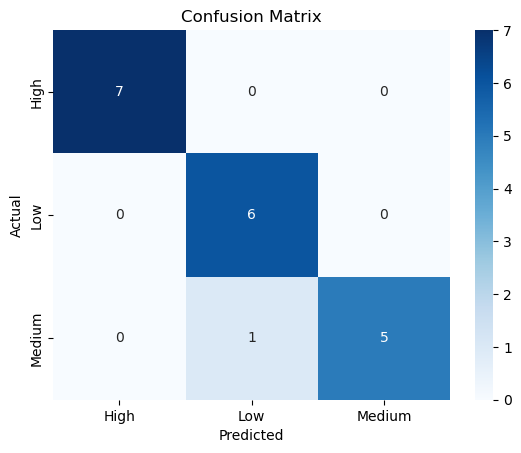

Accuracy: 94.74%


In [48]:
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


In [49]:
feature_importances = rf_classifier.feature_importances_



In [50]:
X.columns

MultiIndex([(        'Burning - Crop residues', 'Emissions (CH4)'),
            (                         'Energy', 'Emissions (CH4)'),
            (           'Enteric Fermentation', 'Emissions (CH4)'),
            (                           'IPPU', 'Emissions (CH4)'),
            (              'Manure Management', 'Emissions (CH4)'),
            (               'Rice Cultivation', 'Emissions (CH4)'),
            (                          'Waste', 'Emissions (CH4)'),
            ('Agrifood Systems Waste Disposal', 'Emissions (CH4)'),
            ('Fires in humid tropical forests', 'Emissions (CH4)'),
            (         'Fires in organic soils', 'Emissions (CH4)'),
            (     'Food Household Consumption', 'Emissions (CH4)'),
            (                 'Food Packaging', 'Emissions (CH4)'),
            (                'Food Processing', 'Emissions (CH4)'),
            (                    'Food Retail', 'Emissions (CH4)'),
            (                 'Food Transport', 

In [51]:
# Display the importance of each feature

feature_importances = rf_classifier.feature_importances_

In [52]:
X.columns = ['_'.join(col) for col in X.columns]

# Create DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the result
print(importance_df)

                                            Feature  Importance
6                             Waste_Emissions (CH4)    0.065680
36                    Crop Residues_Emissions (N2O)    0.065517
1                            Energy_Emissions (CH4)    0.062945
43            Synthetic Fertilizers_Emissions (N2O)    0.058466
42                            Other_Emissions (N2O)    0.055001
40          Manure applied to Soils_Emissions (N2O)    0.044984
30                   Food Transport_Emissions (CO2)    0.040276
37                           Energy_Emissions (N2O)    0.039984
2              Enteric Fermentation_Emissions (CH4)    0.039663
19                           Energy_Emissions (CO2)    0.039118
41           Manure left on Pasture_Emissions (N2O)    0.038751
20                             IPPU_Emissions (CO2)    0.036001
44                            Waste_Emissions (N2O)    0.030261
13                      Food Retail_Emissions (CH4)    0.028206
53                   Food Transport_Emis

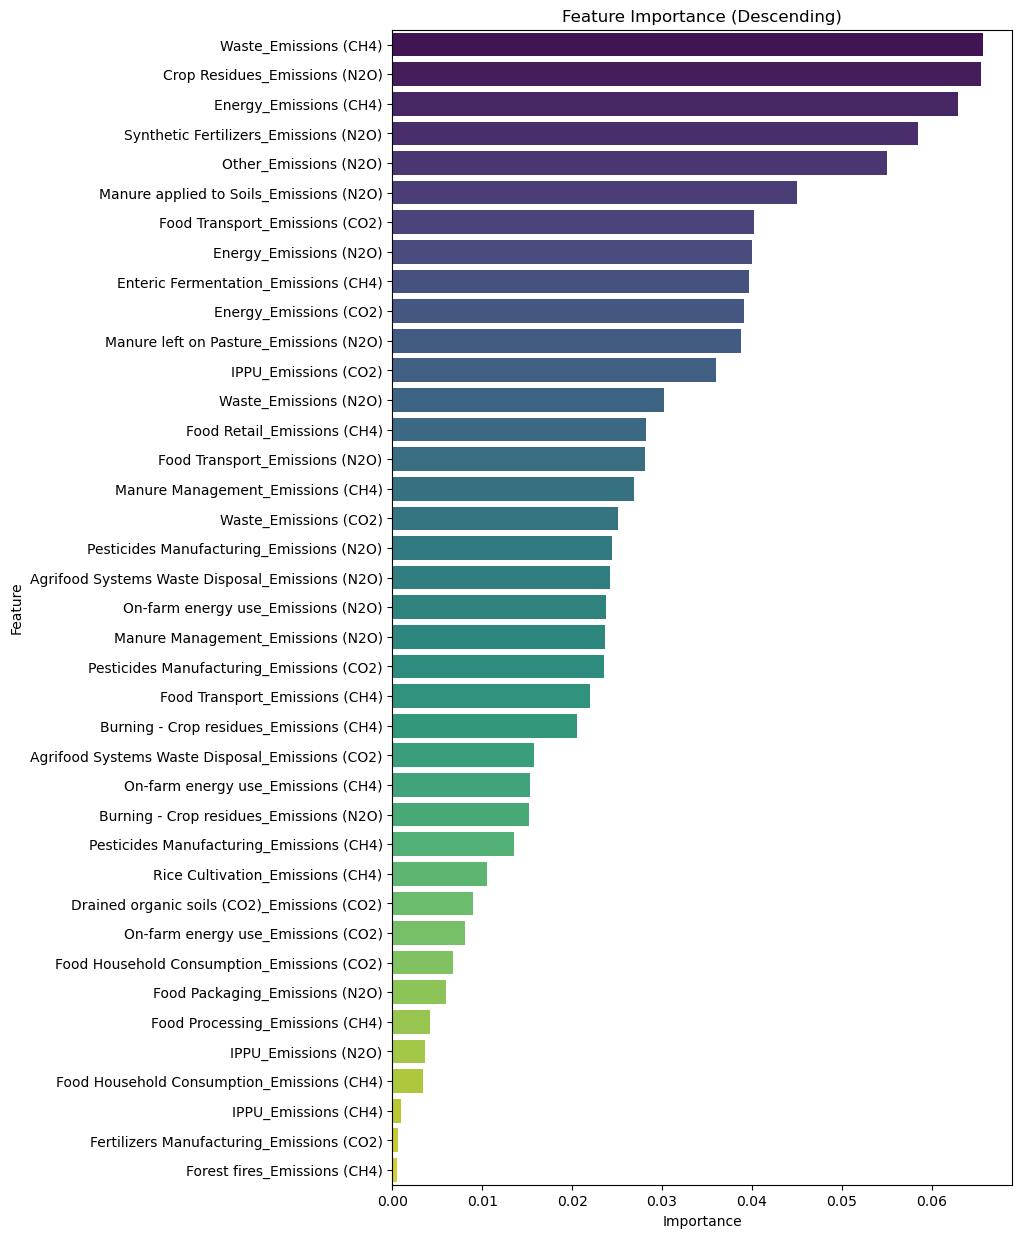

In [53]:
importance_df = importance_df[importance_df["Importance"]!=0]

# Step 9: Plot the feature importances in descending order
plt.figure(figsize=(8, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Descending)')
plt.show()
